In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
dataset= pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# checking for missing value
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing Anual Income column and and Spending Score column

In [7]:
x=dataset.iloc[:,3:5].values


Choosing the number of clusters

In [8]:
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

In [9]:
WCSS

[269981.28,
 183653.32894736843,
 106348.37306211118,
 73880.64496247194,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.837785187785,
 24766.47160979344,
 23103.122085983916]

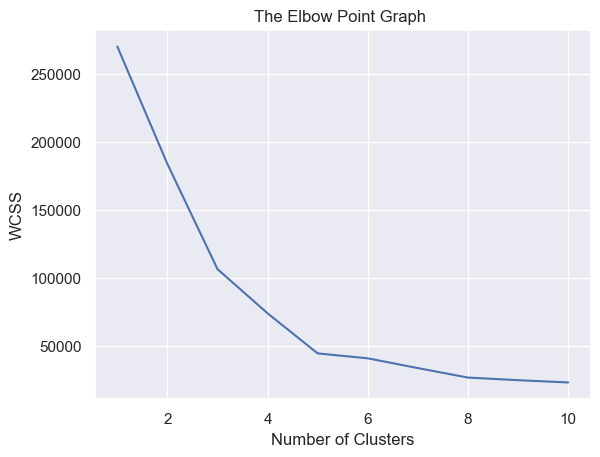

In [10]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Point Graph ")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

optimum number of cluster =5

Training the model KMean Clustering 

In [11]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)

#return a label for each data point based on their cluster 
y= kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visulizing the Cluster

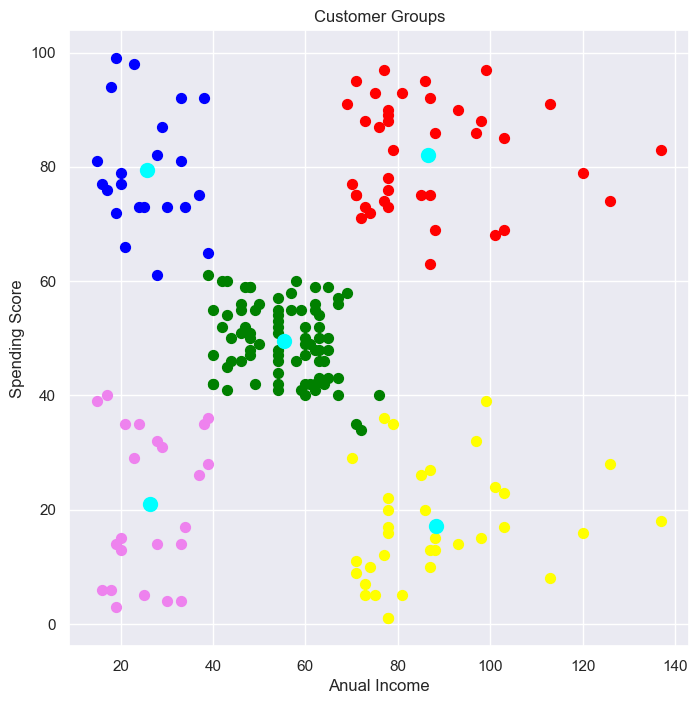

In [12]:
#ploting the cluster
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50, c="green",label="Cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],s=50, c="red",label="Cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],s=50, c="yellow",label="Cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],s=50, c="violet",label="Cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],s=50, c="blue",label="Cluster 5")
#plort the centroid 
plt .scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="cyan", label="Centroids") 

plt.title("Customer Groups")
plt.xlabel("Anual Income")
plt.ylabel("Spending Score")
plt.show()

In [13]:
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset['Cluster'] = y
print("\nMean of features for each cluster:")
dataset.groupby('Cluster')[numeric_columns].mean()



Mean of features for each cluster:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,164.371429,41.114286,88.200000,17.114286
3,23.000000,45.217391,26.304348,20.913043
4,23.090909,25.272727,25.727273,79.363636


In [34]:
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=0.5, min_samples=6)#.fit(x)

label=dbscan.fit_predict(x)
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

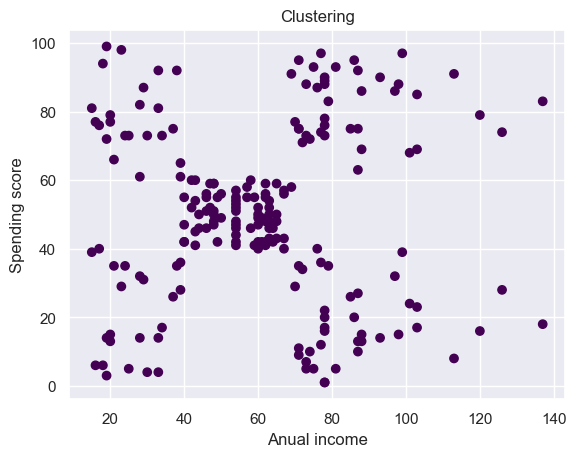

In [31]:
plt.scatter(x[:,0], x[:,1], c=label, cmap='viridis', marker='o')
plt.title("Clustering")
plt.xlabel("Anual income")
plt.ylabel("Spending score")
plt.show()